## Did location equate to more funding for US startups?

## Case Study Proposal:
Creating a startup is one of the biggest risks that an entrepreneur can make in their career aspirations.  Funding from venture capital firms or investors is one of the make or break elements of a start up as an inability to raise money can quickly result in the shuttering of the startup.  There are many things to consider when starting a company and the one which I want to assess is how the location of the startup factors in the ability to raise funding.  For this case study, I will be reviewing the funds that were raised by startups from 2000 - 2014 to answer the question if location has an impact on the ability of a startup to raise funding for their company.  

## Dataset
The dataset I will be leveraging is Startup Analysis Dataset which provides funding details for US startups 

https://www.kaggle.com/siddarthareddyt/startup-analysis-dataset

In [1]:
# import libraries
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#Load data into a dataframe
data = pd.read_csv("final_data1.csv")

#create datframe for values for problem
data_part = data[['funding_total_usd', 'state_code', 'category_list', 'status', 'founded_at', 'funding_rounds', 'Number_of_Investors']]

data_part.funding_total_usd = data_part.funding_total_usd.astype(float)

train = data_part

C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [3]:
#check the dimension of the table
print("The dimension of the table is: ", train.shape)

The dimension of the table is:  (13713, 7)


In [4]:
#Look at the data
print(train.head(5))

   funding_total_usd state_code  category_list     status  founded_at  \
0               20.0         RI         Health  operating        1902   
1                6.0         MD     Management  operating        1906   
2               10.0         KY  Manufacturing  operating        1906   
3               16.5         LA        Finance        ipo        1908   
4              245.0         IL  Entertainment  operating        1909   

   funding_rounds  Number_of_Investors  
0               1                    1  
1               2                    1  
2               1                    1  
3               1                    1  
4               2                    2  


In [5]:
#see data types of dataframe
train.dtypes

funding_total_usd      float64
state_code              object
category_list           object
status                  object
founded_at               int64
funding_rounds           int64
Number_of_Investors      int64
dtype: object

In [6]:
# lets focus on startups founded 2000 - 2010 as trends change over time 
train = train[train.founded_at >= 2000]
train = train[train.founded_at <= 2010]

#train = train.drop('founded_at',axis = 1)

In [7]:
# show summary statistics of the dataframe
print("Describe Data")
print(train.describe())
print("Summarized Data")
print(train.describe(include=['O']))

Describe Data
       funding_total_usd   founded_at  funding_rounds  Number_of_Investors
count        6605.000000  6605.000000     6605.000000          6605.000000
mean           41.049049  2006.274792        3.134595             4.257835
std           157.639236     3.083785        2.245911             4.062912
min             0.010000  2000.000000        1.000000             1.000000
25%             3.200000  2004.000000        1.000000             1.000000
50%            12.366014  2007.000000        3.000000             3.000000
75%            39.129500  2009.000000        4.000000             6.000000
max          8207.450000  2010.000000       19.000000            53.000000
Summarized Data
       state_code category_list     status
count        6605          6605       6605
unique         51            26          4
top            CA      Software  operating
freq         2747          2284       5070


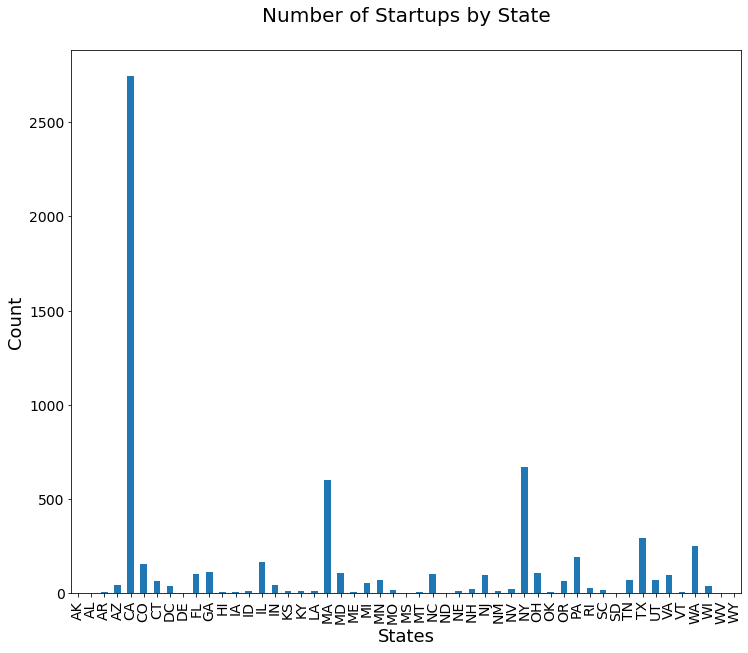

In [8]:
#display bar chart of states with startups
ax = train['state_code'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Number of Startups by State\n', fontsize=20)
ax.set_xlabel('States', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

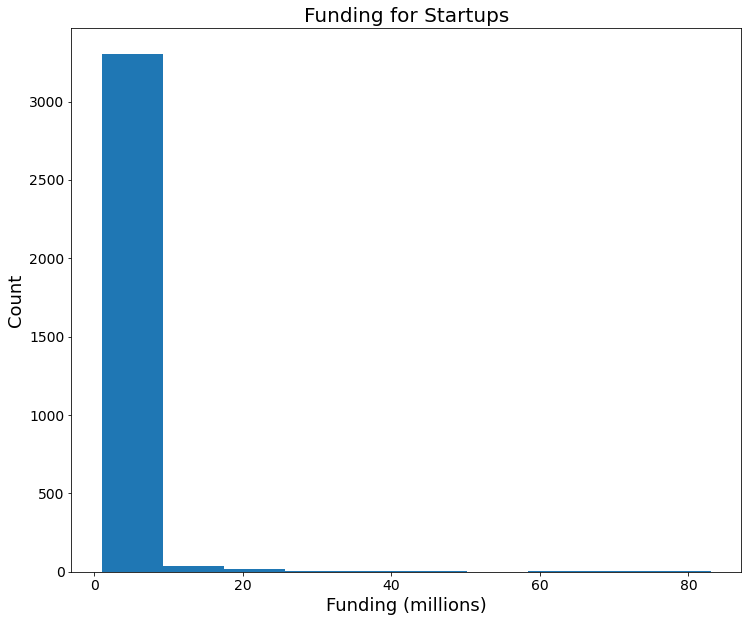

In [9]:
#display bar chart of totol funding for starupds
ax = train['funding_total_usd'].value_counts().sort_index().plot(kind='hist', fontsize=14, figsize=(12,10))
ax.set_title('Funding for Startups', fontsize=20)
ax.set_xlabel('Funding (millions)', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

Text(0, 0.5, 'Funding (hundreds millions)')

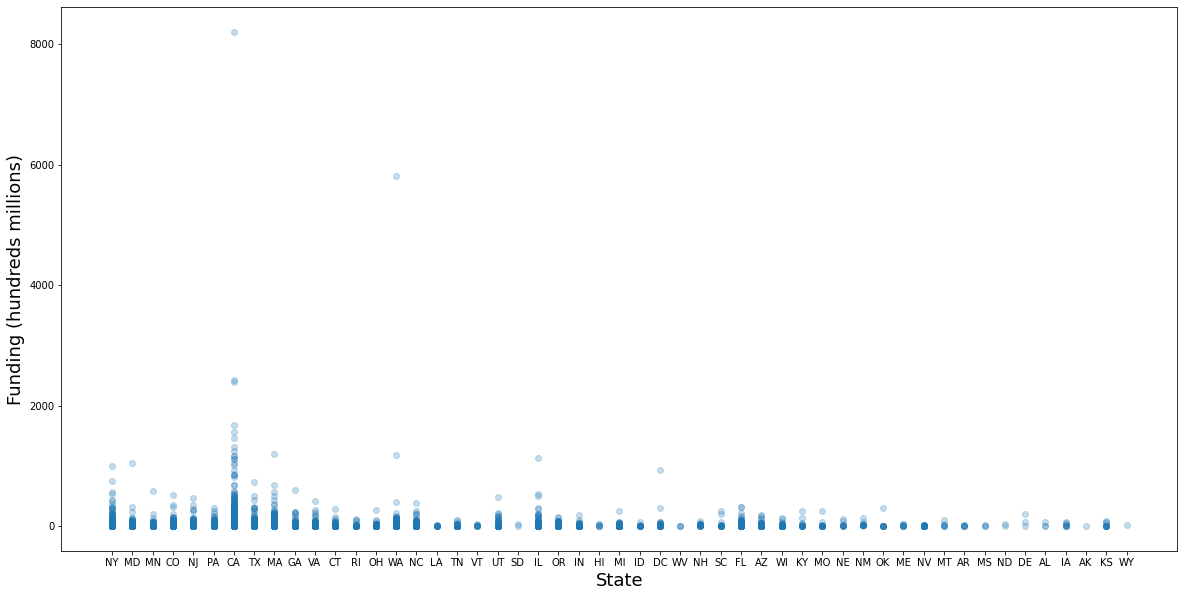

In [10]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# observe sactter of funding per state
plt.scatter(train['state_code'] , train['funding_total_usd'], alpha=0.25)
plt.xlabel('State', fontsize=18)
plt.ylabel('Funding (hundreds millions)', fontsize=18)

## Part 2 - Dimensionality and Feature Reduction


In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
#  encode categorical values with labels
from sklearn import preprocessing
from collections import defaultdict
    
#get the categorical data
data_cat = train[['state_code', 'category_list', 'status', 'founded_at']] 

# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)

# drop the old state column
train = train.drop('state_code',axis = 1)
train = train.drop('category_list',axis = 1)
train = train.drop('status',axis = 1)
train = train.drop('founded_at',axis = 1)

# Join the encoded state columns
train = train.join(data_cat_dummies)

In [13]:
train.funding_total_usd = train.funding_total_usd[np.abs(train.funding_total_usd-train.funding_total_usd.mean()) <= (3*train.funding_total_usd.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 

In [14]:
train = train.reset_index(drop=True)

label_train = train['funding_total_usd']
features_train = train.loc[:, train.columns != 'funding_total_usd']

In [15]:
# encode continuous variable
enc = preprocessing.LabelEncoder()
label_train = enc.fit_transform(label_train)

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_train, label_train, test_size=0.5, random_state=0)


In [16]:
# Random forest prediction
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

In [17]:
df=pd.DataFrame({'Actual':y_train, 'Predicted':pred_train})
df

,Actual,Predicted
0,1623,1623
1,1270,1270
2,1311,1311
3,1540,1540
4,73,73
...,...,...
3297,2765,2765
3298,10,10
3299,1658,1658
3300,224,224


C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


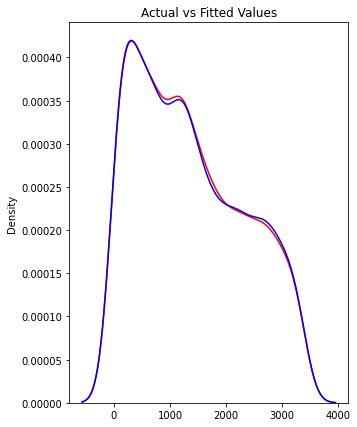

In [18]:
import seaborn as sns
plt.figure(figsize=(5, 7))

ax = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(pred_train, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values')


plt.show()
plt.close()

C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


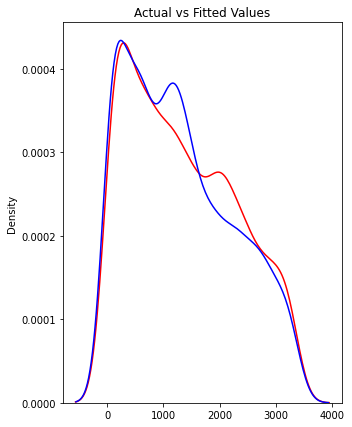

In [19]:
import seaborn as sns
plt.figure(figsize=(5, 7))

ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(pred_test, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values')


plt.show()
plt.close()

In [20]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
df

,Actual,Predicted
0,824,136
1,1111,1499
2,66,2045
3,486,2019
4,330,19
...,...,...
3298,255,1377
3299,544,2682
3300,779,1330
3301,2235,1593


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# View the classification report for test data and predictions
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         0
           3       0.50      0.20      0.29         5
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         3
           8       0.09      0.25      0.14        16
          10       0.13      0.12      0.12        17
          11       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          17       0.07      0.14      0.10        14
          19       0.00      0.00      0.00        16
          20       0.00      0.00      0.00         1
          21       0.00    

In [22]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train);
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

df=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
df

C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Actual,Predicted
0,824,470.710000
1,1111,1452.258333
2,66,501.770000
3,486,589.854333
4,330,200.649750
...,...,...
3298,255,757.615167
3299,544,914.762667
3300,779,1208.310000
3301,2235,2072.253333
